# Exploring Image Classification of Artwork

This project explores various image classification methods to categorize artwork by artistic style. We aim to identify styles such as Pop Art, Realism, Baroque, and others using techniques like Convolutional Neural Networks (CNNs), data augmentation, and the ResNet50 model. Our goal is to evaluate these methods and determine which yields the most accurate classification results.

Our dataset currently contains 81444 unique images from 1119 different artists in 27 styles

## Import Dataset



In [82]:
pip install kaggle

In [83]:
import kagglehub

# Download WikiArt dataset
path = kagglehub.dataset_download("steubk/wikiart")

print("Path to dataset files:", path)
path = kagglehub.dataset_download("steubk/wikiart")

print(path)

Path to dataset files: /kaggle/input/wikiart
/kaggle/input/wikiart


In [84]:
# View files in Wikiart
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
dataset_path = path
dataset_length = len(os.listdir(dataset_path))
print(f"The dataset contains {dataset_length} items.")
items = os.listdir(path)
print(items)

The dataset contains 29 items.
['Pop_Art', 'Minimalism', 'Color_Field_Painting', 'Mannerism_Late_Renaissance', 'Symbolism', 'Impressionism', 'Contemporary_Realism', 'High_Renaissance', 'Fauvism', 'Rococo', 'Early_Renaissance', 'Naive_Art_Primitivism', 'Pointillism', 'classes.csv', 'Cubism', 'Synthetic_Cubism', 'Action_painting', 'Abstract_Expressionism', 'New_Realism', 'wclasses.csv', 'Baroque', 'Analytical_Cubism', 'Expressionism', 'Romanticism', 'Northern_Renaissance', 'Ukiyo_e', 'Post_Impressionism', 'Art_Nouveau_Modern', 'Realism']


In [85]:
all_items = os.listdir(path)
print(all_items)
files = [item for item in all_items if os.path.isfile(os.path.join(path, item))]
folders = [item for item in all_items if os.path.isdir(os.path.join(path, item))]

print("Files:", files)
print("Folders:", folders)

['Pop_Art', 'Minimalism', 'Color_Field_Painting', 'Mannerism_Late_Renaissance', 'Symbolism', 'Impressionism', 'Contemporary_Realism', 'High_Renaissance', 'Fauvism', 'Rococo', 'Early_Renaissance', 'Naive_Art_Primitivism', 'Pointillism', 'classes.csv', 'Cubism', 'Synthetic_Cubism', 'Action_painting', 'Abstract_Expressionism', 'New_Realism', 'wclasses.csv', 'Baroque', 'Analytical_Cubism', 'Expressionism', 'Romanticism', 'Northern_Renaissance', 'Ukiyo_e', 'Post_Impressionism', 'Art_Nouveau_Modern', 'Realism']
Files: ['classes.csv', 'wclasses.csv']
Folders: ['Pop_Art', 'Minimalism', 'Color_Field_Painting', 'Mannerism_Late_Renaissance', 'Symbolism', 'Impressionism', 'Contemporary_Realism', 'High_Renaissance', 'Fauvism', 'Rococo', 'Early_Renaissance', 'Naive_Art_Primitivism', 'Pointillism', 'Cubism', 'Synthetic_Cubism', 'Action_painting', 'Abstract_Expressionism', 'New_Realism', 'Baroque', 'Analytical_Cubism', 'Expressionism', 'Romanticism', 'Northern_Renaissance', 'Ukiyo_e', 'Post_Impression

In [86]:
# import tensorflow as tf

# # ✅ Step 1: Load full dataset UNBATCHED
# full_dataset = tf.keras.utils.image_dataset_from_directory(
#     dataset_path,
#     image_size=(100, 100),
#     batch_size=None,  # 🚫 no batching!
#     shuffle=True,
#     seed=42
# )

# # ✅ Step 2: Count actual number of samples
# total_samples = tf.data.experimental.cardinality(full_dataset).numpy()
# print("Total samples:", total_samples)

# # ✅ Step 3: Manual split
# train_size = int(0.7 * total_samples)
# val_size = int(0.15 * total_samples)
# test_size = total_samples - train_size - val_size

# train_dataset = full_dataset.take(train_size)
# val_dataset = full_dataset.skip(train_size).take(val_size)
# test_dataset = full_dataset.skip(train_size + val_size)

# # ✅ Step 4: Normalize unbatched samples
# def normalize_img(img, label):
#     return tf.cast(img, tf.float32) / 255.0, label

# train_dataset = train_dataset.map(normalize_img)
# val_dataset = val_dataset.map(normalize_img)
# test_dataset = test_dataset.map(normalize_img)

# # ✅ Step 5: (Optional) Prefetch for performance
# AUTOTUNE = tf.data.AUTOTUNE
# train_dataset = train_dataset.cache().shuffle(1000).prefetch(AUTOTUNE)
# val_dataset = val_dataset.cache().prefetch(AUTOTUNE)
# test_dataset = test_dataset.cache().prefetch(AUTOTUNE)

# # ✅ Step 6: Print summary
# class_names = full_dataset.class_names
# print("✅ Dataset loaded and split successfully")
# print("Classes:", class_names)
# print(f"Train samples: {train_size}")
# print(f"Val samples:   {val_size}")
# print(f"Test samples:  {test_size}")



# # ✅ Step 7: Check shape
# for img, label in train_dataset.take(1):
#     print("Sample image shape:", img.shape)
#     print("Sample label:", label)


In [87]:
import tensorflow as tf
import os

# Set your dataset path
dataset_path = "your_dataset_directory"

# Batch size and image size
batch_size = 16
img_size = (100, 100)
AUTOTUNE = tf.data.AUTOTUNE

# --- Load train and val from 80% of data ---
train_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

# --- Load full dataset once to get test split ---
full_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

# Save class names
class_names = full_dataset.class_names
print(  "✅ Classes:", class_names)

# Count total batches
total_batches = tf.data.experimental.cardinality(full_dataset).numpy()
test_batches = int(0.2 * total_batches)  # 20% for test

# Skip 80% and take the last 20% for test
test_dataset = full_dataset.skip(total_batches - test_batches)

# --- Normalize and prefetch ---
def normalize_img(img, label):
    return tf.cast(img, tf.float32) / 255.0, label

train_dataset = train_dataset.map(normalize_img).cache().shuffle(1000).prefetch(AUTOTUNE)
val_dataset = val_dataset.map(normalize_img).cache().prefetch(AUTOTUNE)
test_dataset = test_dataset.map(normalize_img).cache().prefetch(AUTOTUNE)


Found 81444 files belonging to 27 classes.
Using 65156 files for training.
Found 81444 files belonging to 27 classes.
Using 16288 files for validation.
Found 81444 files belonging to 27 classes.
✅ Classes: ['Abstract_Expressionism', 'Action_painting', 'Analytical_Cubism', 'Art_Nouveau_Modern', 'Baroque', 'Color_Field_Painting', 'Contemporary_Realism', 'Cubism', 'Early_Renaissance', 'Expressionism', 'Fauvism', 'High_Renaissance', 'Impressionism', 'Mannerism_Late_Renaissance', 'Minimalism', 'Naive_Art_Primitivism', 'New_Realism', 'Northern_Renaissance', 'Pointillism', 'Pop_Art', 'Post_Impressionism', 'Realism', 'Rococo', 'Romanticism', 'Symbolism', 'Synthetic_Cubism', 'Ukiyo_e']


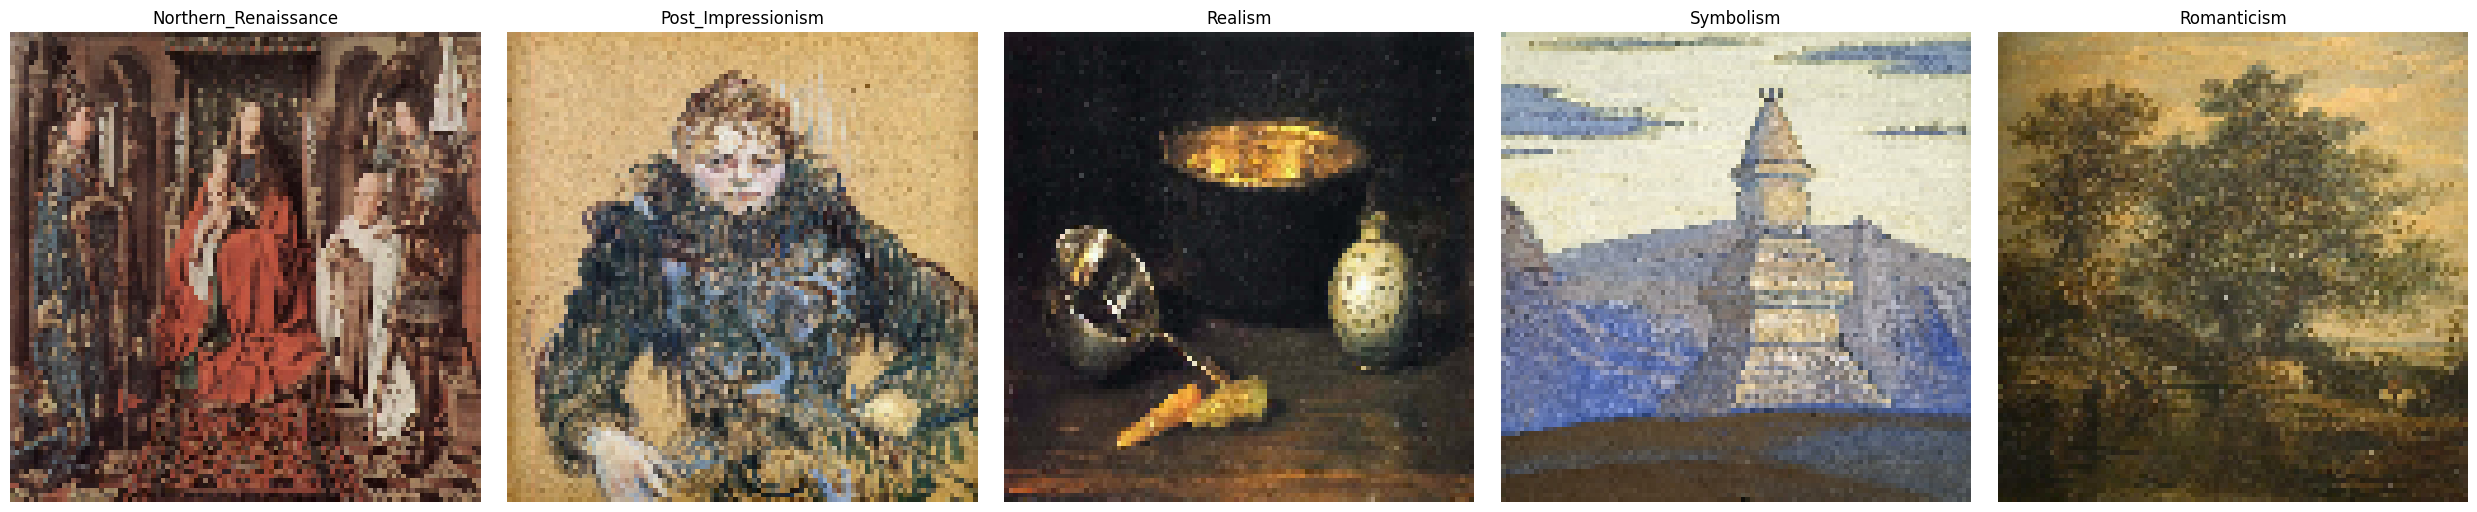

In [88]:
import matplotlib.pyplot as plt

def show_images_with_labels(dataset, class_names, num_images=5):
    plt.figure(figsize=(5 * num_images, 5))

    count = 0
    for item in dataset:
        # Handle batched or unbatched datasets
        if isinstance(item, tuple) and item[0].shape.ndims == 4:
            images, labels = item
            for i in range(images.shape[0]):
                if count >= num_images:
                    break
                img = images[i].numpy()
                label = labels[i].numpy()
                class_name = class_names[label]

                ax = plt.subplot(1, num_images, count + 1)
                ax.imshow(img.astype("uint8") if img.max() > 1 else img)
                ax.set_title(f"{class_name}")
                ax.axis("off")
                count += 1
        else:
            img, label = item
            img = img.numpy()
            label = label.numpy()
            class_name = class_names[label]

            ax = plt.subplot(1, num_images, count + 1)
            ax.imshow(img.astype("uint8") if img.max() > 1 else img)
            ax.set_title(f"{class_name}")
            ax.axis("off")
            count += 1

        if count >= num_images:
            break

    plt.tight_layout()
    plt.show()
show_images_with_labels(train_dataset, class_names, num_images=5)


# Part 1 - Train the Model (Baseline)


*   Train Model
*   Plot the model's accuracy and error
*   Test Score


In [89]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential([
    layers.Input(shape=(100, 100, 3)),

    layers.Conv2D(32, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(27, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [90]:
# Build baseline
input_shape = (100, 100, 3)
baseline = model

In [91]:
baseline.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 98, 98, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 98, 98, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 47, 47, 64)          │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 47, 47, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 21, 21, 128)         │          73,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,931 (405.98 KB)

 Trainable params: 103,483 (404.23 KB)

 Non-trainable params: 448 (1.75 KB)

In [98]:
import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Batch the datasets
batch_size = 32

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath="baseline.keras", save_best_only=True, monitor="val_loss")
]

history = baseline.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.2858 - loss: 2.2594 - val_accuracy: 0.2228 - val_loss: 2.7764
Epoch 2/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.2962 - loss: 2.2155 - val_accuracy: 0.3076 - val_loss: 2.1766
Epoch 3/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.3030 - loss: 2.1876 - val_accuracy: 0.2648 - val_loss: 2.3516
Epoch 4/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.3118 - loss: 2.1617 - val_accuracy: 0.3294 - val_loss: 2.1196
Epoch 5/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.3178 - loss: 2.1392 - val_accuracy: 0.2592 - val_loss: 2.2646
Epoch 6/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.3258 - loss: 2.1137 - val_accuracy: 0.3321 - val_loss: 2.0889
Epoch 7/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.3260 - loss: 2.1047 - val_accuracy: 0.3347 - val_loss: 2.0837
Epoch 8/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.3298 - loss: 2

# Part 2 - Use Data Augmentation


# Part 3 - Use Resnet50 to classify images

In [94]:
# Imports
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models

# Load pretrained model
resnet = models.resnet50(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [95]:
# Modify final layer for current project
import torch.nn as nn

num_classes = 27  # change this to however many genres or categories you have
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

In [96]:
# Define transforms to preprocess images
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [97]:
# Load dataset to train
train_dataset = datasets.ImageFolder('dataset/train', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = datasets.ImageFolder('dataset/val', transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/train'